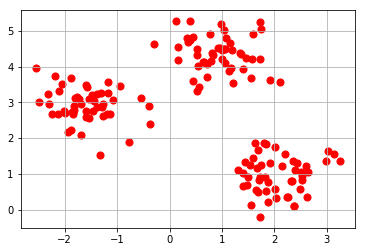

In [5]:
# Visualizing clustering models
# First, we create a 2d dataset for visualization purposes
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

%matplotlib inline

# 150 randomly generated points distributed into 3 regions
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

plt.scatter(X[:,0],
            X[:,1],
            c='red',
            marker='o',
            s=50)

plt.grid()

In [6]:
# Lets see how k-means algorithm can help
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,  # Run this 10 times and choose the one with the lowest SSE
            max_iter=300,  # Max iteration 300 times
            tol=1e-04,  # Increase this parameter if the algo does not reach convergence
            random_state=0)

y_km = km.fit_predict(X)

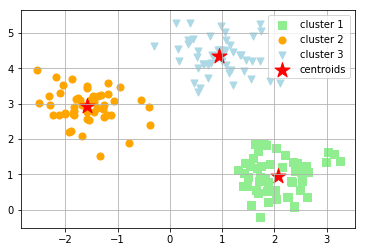

In [8]:
# Let's visualize the results
# Centroid is the center of gravity of each cluster
plt.scatter(X[y_km==0,0],
            X[y_km ==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')

plt.scatter(X[y_km ==1,0],
            X[y_km ==1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(X[y_km ==2,0],
            X[y_km ==2,1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3')

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')

plt.legend()
plt.grid()

Text(0,0.5,'Distortion')

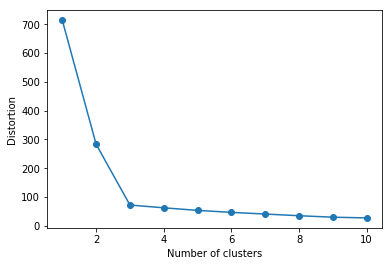

In [10]:
# We can use cluster inertia to have a sense what number of clusters is optimal
# From the diagram, it seems that the improvement from 1 to 2 to 3 cluster is huge, but not so much from 3 to 4 and onwards
# In consideration of computational resource vs accuracy, we will probably choose 3 clusters
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)
        
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

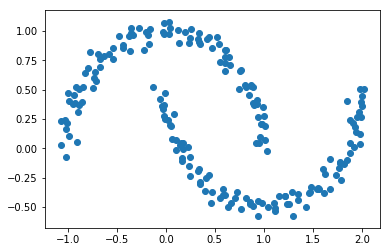

In [11]:
# This is one of my favourite example of clustering algorithms using DBSCAN

# First, let's create a complex dataset
# If a clustering algorithm is good, we should get all the points in the frown segment in 1 cluster,
# and all the points in the smile segment in another cluster
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)
plt.scatter(X[:,0], X[:,1])

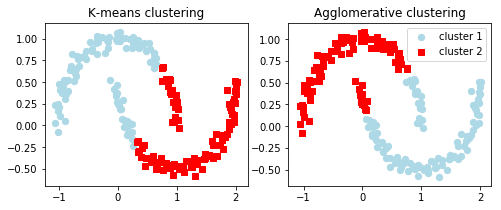

In [13]:
# Let's see if k-means and a more complex hierarchical clustering can split the dataset correctly
from sklearn.cluster import AgglomerativeClustering
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
km = KMeans(n_clusters=2,
            random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],
            X[y_km==0,1],
            c='lightblue',
            marker='o',
            s=40,
            label='cluster 1')

ax1.scatter(X[y_km==1,0],
            X[y_km==1,1],
            c='red',
            marker='s',
            s=40,
            label='cluster 2')

ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')

y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],
            X[y_ac==0,1],
            c='lightblue',
            marker='o',
            s=40,
            label='cluster 1')

ax2.scatter(X[y_ac==1,0],
            X[y_ac==1,1],
            c='red',
            marker='s',
            s=40,
            label='cluster 2')

ax2.set_title('Agglomerative clustering')
plt.legend()

# Both fails to cluster accurately

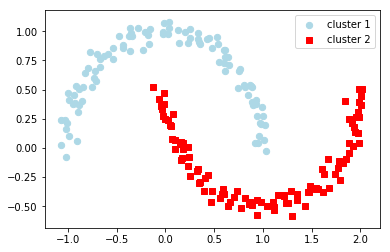

In [14]:
# Lets try DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0],
            X[y_db==0,1],
            c='lightblue',
            marker='o',
            s=40,
            label='cluster 1')

plt.scatter(X[y_db==1,0],
            X[y_db==1,1],
            c='red',
            marker='s',
            s=40,
            label='cluster 2')

plt.legend()

# DBSCAN successfully detect the complex shapes
# Generally its a powerful clustering algorithm that can cluster data of arbitrary shapes
# However, note that there are 2 hyperparameters (Minpts and epsilon) 
# that need to be optimized to get good clustering results